In [ ]:
# Assignment 1- Machine Learning course, 
# Part of: Student: Mariam Ahmed Amin
#     ID :  20170279

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

def hypothesis(features,thetas):
  return np.dot(features,thetas)

def gradient_descent(thetas,features,loss):
  sub_term = [ i*loss for i in features]
   
  return np.subtract(thetas,sub_term)


def MLR(X,Y,dataset_size,alpha,numOfIterations):


  thetas = (1+len(X[0]))*[1]
  lastError=100
  lastThetas = (1+len(X[0]))*[1]
  error = []
  #loop over iterations
  for i in range(numOfIterations):
    loss = 0 
    MSE = 0
    # loop over each record 
    for j in range (int(dataset_size)):
      x = [1]+X[j]
      y = Y[j][0]
      # calculate the hypothesis 
      h = hypothesis(x,thetas)
      # calculate the mean square error of current record 
      MSE_per_record = pow(h-y,2)/(2.0*dataset_size) 
      # add it to total MSE of the current iteration
      MSE+=MSE_per_record
      # calculate the loss
      # multiply by 2, because 2 came from the derivative of the MSE function
      loss += (h-y)*(1.0/(dataset_size))*alpha
    # if it finds local minima 
    if(MSE>lastError):
      print("Converged with mean square error = "+ str(lastError))
      print("with thetas= "+str(lastThetas))

      
      plt.plot(error)
      plt.ylabel('MSE over iterations')
      plt.show()
      return thetas
      break
    else:
      lastError = MSE.copy()
    # update the weights
    lastThetas = thetas.copy()
    thetas =  gradient_descent(thetas,x,loss) 
    print("In iteration: "+str(i)+", The Mean Square error = "+str(np.format_float_positional(MSE, trim='-')))
    error.append(MSE)
  plt.plot(error)
  plt.ylabel('MSE over iterations')
  plt.show()
  return thetas



In [ ]:
# read the data
house_data= pd.read_csv("house_data.csv")

In [ ]:
# selecting features and the label
features = house_data.loc[:,["grade", "bathrooms", "lat","sqft_living","view"]]
labels = house_data.loc[:,["price"]]
#house_data.dtypes
#features.head()

In [ ]:
#features.describe()

In [ ]:
# normalize the dataset
features =(features-features.mean())/(features.max()-features.min())
labels = (labels-labels.mean())/(labels.max()-labels.min())


In [ ]:
features.describe()

,grade,bathrooms,lat,sqft_living,view
count,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04
mean,-4.636920e-16,2.201825e-15,6.088836e-14,2.588641e-17,6.846181e-16
std,9.795490e-02,9.627039e-02,2.228787e-01,6.931629e-02,1.915794e-01
min,-5.547394e-01,-2.643447e-01,-6.500764e-01,-1.350868e-01,-5.857586e-02
25%,-5.473943e-02,-4.559467e-02,-1.432403e-01,-4.927545e-02,-5.857586e-02
50%,-5.473943e-02,1.690533e-02,1.889574e-02,-1.282262e-02,-5.857586e-02
75%,2.859390e-02,4.815533e-02,1.897177e-01,3.547927e-02,-5.857586e-02
max,4.452606e-01,7.356553e-01,3.499236e-01,8.649132e-01,9.414241e-01


Enter the learning rate:0.1
In iteration: 0, The Mean Square error = 0.573830536234146
In iteration: 1, The Mean Square error = 0.4794773056296446
In iteration: 2, The Mean Square error = 0.4031179932719223
In iteration: 3, The Mean Square error = 0.3413270742509024
In iteration: 4, The Mean Square error = 0.29133054143373843
In iteration: 5, The Mean Square error = 0.25088205028270727
In iteration: 6, The Mean Square error = 0.21816260283815866
In iteration: 7, The Mean Square error = 0.19169929775708472
In iteration: 8, The Mean Square error = 0.17029952325552014
In iteration: 9, The Mean Square error = 0.15299765826195083
In iteration: 10, The Mean Square error = 0.1390119047345873
In iteration: 11, The Mean Square error = 0.12770932578310598
In iteration: 12, The Mean Square error = 0.11857753009752245
In iteration: 13, The Mean Square error = 0.11120173953080358
In iteration: 14, The Mean Square error = 0.10524621671650541
In iteration: 15, The Mean Square error = 0.10043922402719

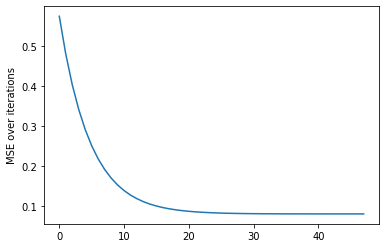

To predict
Enter the grade. 5
Enter the num of bathrooms. 3
Enter the lat. 67
Enter the sqft_living. 180
Enter the view. 2
The price of the house = 268.5643590358882$


In [ ]:
# running the model
lr = float(input("Enter the learning rate:"))
thetas = MLR(features.values.tolist(),labels.values.tolist(),len(labels),lr,1000)
print("To predict")
grade= float(input("Enter the grade. "))
bathrooms= int(input("Enter the num of bathrooms. "))
lat= float(input("Enter the lat. "))
sqft_living= float(input("Enter the sqft_living. "))
view= int(input("Enter the view. "))

print("The price of the house = "+str(hypothesis([1,grade,bathrooms,lat,sqft_living,view],thetas))+"$")